<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.326260,23.879221,76.969532,0.000249,160.175263,160.175273,-0.000010
1,0.0,1.0,40.142539,39.354795,53.905282,-0.001420,143.401196,143.402738,-0.001542
2,0.0,2.0,40.032927,40.117588,58.178405,-0.000750,148.328170,148.329106,-0.000936
3,0.0,3.0,72.213814,66.328184,86.358866,0.002270,234.903134,234.900890,0.002244
4,0.0,4.0,70.494277,98.868261,81.823212,-0.000282,261.185467,261.185784,-0.000317
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.221909,77.875510,57.158453,0.002102,222.257975,222.255907,0.002068
119996,999.0,116.0,97.165976,66.028034,48.953417,0.000945,222.148372,222.147887,0.000485
119997,999.0,117.0,72.095642,55.274446,87.301475,0.000099,224.671661,224.672674,-0.001012
119998,999.0,118.0,80.021649,91.079016,70.177670,-0.000975,251.277360,251.278196,-0.000836


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.326260,23.879221,76.969532,0.000249,160.175263,160.175273,-0.000010
1,0.0,1.0,40.142539,39.354795,53.905282,-0.001420,143.401196,143.402738,-0.001542
2,0.0,2.0,40.032927,40.117588,58.178405,-0.000750,148.328170,148.329106,-0.000936
3,0.0,3.0,72.213814,66.328184,86.358866,0.002270,234.903134,234.900890,0.002244
4,0.0,4.0,70.494277,98.868261,81.823212,-0.000282,261.185467,261.185784,-0.000317
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.221909,77.875510,57.158453,0.002102,222.257975,222.255907,0.002068
119996,999.0,116.0,97.165976,66.028034,48.953417,0.000945,222.148372,222.147887,0.000485
119997,999.0,117.0,72.095642,55.274446,87.301475,0.000099,224.671661,224.672674,-0.001012
119998,999.0,118.0,80.021649,91.079016,70.177670,-0.000975,251.277360,251.278196,-0.000836


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    49.326260  23.879221  76.969532  0.000249  160.175263   
      1.0    40.142539  39.354795  53.905282 -0.001420  143.401196   
      2.0    40.032927  40.117588  58.178405 -0.000750  148.328170   
      3.0    72.213814  66.328184  86.358866  0.002270  234.903134   
      4.0    70.494277  98.868261  81.823212 -0.000282  261.185467   
...                ...        ...        ...       ...         ...   
999.0 115.0  77.221909  77.875510  57.158453  0.002102  222.257975   
      116.0  97.165976  66.028034  48.953417  0.000945  222.148372   
      117.0  72.095642  55.274446  87.301475  0.000099  224.671661   
      118.0  80.021649  91.079016  70.177670 -0.000975  251.277360   
      119.0  43.678314  40.961393  66.664458  0.000927  161.305092   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.175273 -0.000010  
      1.0    143.402738 -0.001542  
      2.0    148.329106 -0.000936  
      3.0    234.900890  0.002244  
      4.0    261.185784 -0.000317  
...                 ...       ...  
999.0 115.0  222.255907  0.002068  
      116.0  222.147887  0.000485  
      117.0  224.672674 -0.001012  
      118.0  251.278196 -0.000836  
      119.0  161.305118 -0.000026  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    49.326260  23.879221  76.969532  0.000249  160.175263   
      1.0    40.142539  39.354795  53.905282 -0.001420  143.401196   
      2.0    40.032927  40.117588  58.178405 -0.000750  148.328170   
      3.0    72.213814  66.328184  86.358866  0.002270  234.903134   
      4.0    70.494277  98.868261  81.823212 -0.000282  261.185467   
...                ...        ...        ...       ...         ...   
999.0 115.0  77.221909  77.875510  57.158453  0.002102  222.257975   
      116.0  97.165976  66.028034  48.953417  0.000945  222.148372   
      117.0  72.095642  55.274446  87.301475  0.000099  224.671661   
      118.0  80.021649  91.079016  70.177670 -0.000975  251.277360   
      119.0  43.678314  40.961393  66.664458  0.000927  161.305092   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.175273 -0.000010  
      1.0    143.402738 -0.001542  
      2.0    148.329106 -0.000936  
      3.0    234.900890  0.002244  
      4.0    261.185784 -0.000317  
...                 ...       ...  
999.0 115.0  222.255907  0.002068  
      116.0  222.147887  0.000485  
      117.0  224.672674 -0.001012  
      118.0  251.278196 -0.000836  
      119.0  161.305118 -0.000026  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.326260,23.879221,76.969532,0.000249,160.175263,160.175273,-0.000010
1,0.0,1.0,40.142539,39.354795,53.905282,-0.001420,143.401196,143.402738,-0.001542
2,0.0,2.0,40.032927,40.117588,58.178405,-0.000750,148.328170,148.329106,-0.000936
3,0.0,3.0,72.213814,66.328184,86.358866,0.002270,234.903134,234.900890,0.002244
4,0.0,4.0,70.494277,98.868261,81.823212,-0.000282,261.185467,261.185784,-0.000317
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.221909,77.875510,57.158453,0.002102,222.257975,222.255907,0.002068
119996,999.0,116.0,97.165976,66.028034,48.953417,0.000945,222.148372,222.147887,0.000485
119997,999.0,117.0,72.095642,55.274446,87.301475,0.000099,224.671661,224.672674,-0.001012
119998,999.0,118.0,80.021649,91.079016,70.177670,-0.000975,251.277360,251.278196,-0.000836


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    49.326260  23.879221  76.969532  0.000249  160.175263   
      1.0    40.142539  39.354795  53.905282 -0.001420  143.401196   
      2.0    40.032927  40.117588  58.178405 -0.000750  148.328170   
      3.0    72.213814  66.328184  86.358866  0.002270  234.903134   
      4.0    70.494277  98.868261  81.823212 -0.000282  261.185467   
...                ...        ...        ...       ...         ...   
999.0 115.0  77.221909  77.875510  57.158453  0.002102  222.257975   
      116.0  97.165976  66.028034  48.953417  0.000945  222.148372   
      117.0  72.095642  55.274446  87.301475  0.000099  224.671661   
      118.0  80.021649  91.079016  70.177670 -0.000975  251.277360   
      119.0  43.678314  40.961393  66.664458  0.000927  161.305092   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.175273 -0.000010  
      1.0    143.402738 -0.001542  
      2.0    148.329106 -0.000936  
      3.0    234.900890  0.002244  
      4.0    261.185784 -0.000317  
...                 ...       ...  
999.0 115.0  222.255907  0.002068  
      116.0  222.147887  0.000485  
      117.0  224.672674 -0.001012  
      118.0  251.278196 -0.000836  
      119.0  161.305118 -0.000026  

[120000 rows x 7 columns]

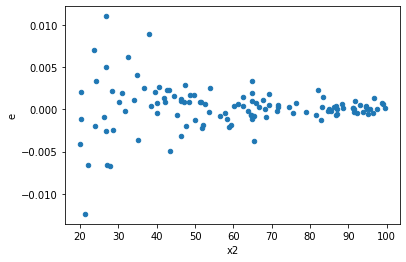

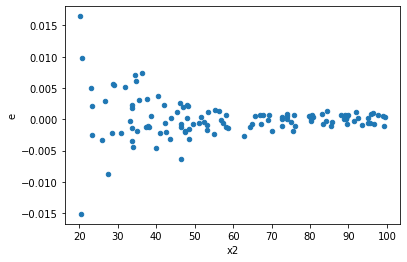

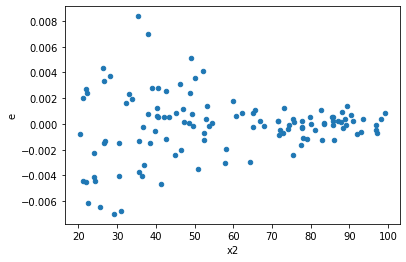

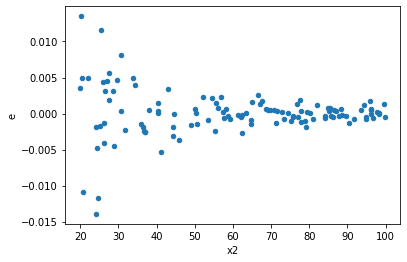

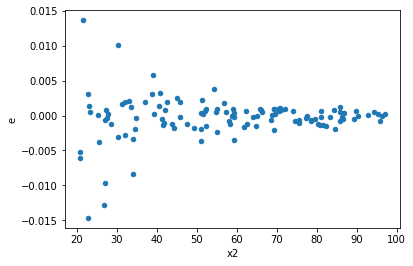

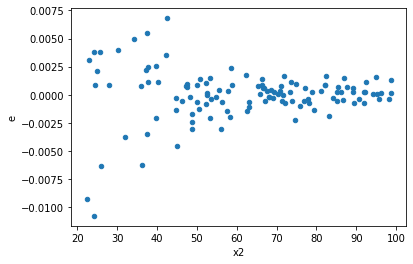

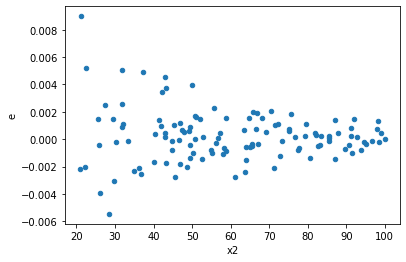

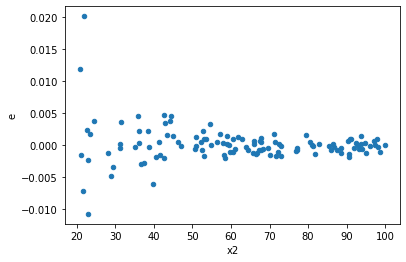

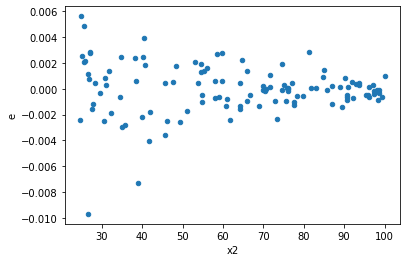

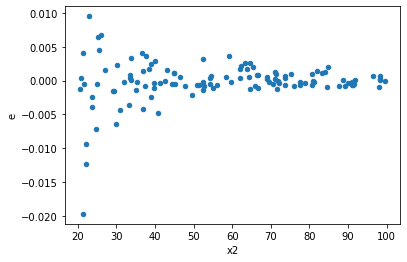

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.00044070036334876615,3.667969885478382e-05,9.793341407750358e-06,8.15104418995196e-07,0.08323047109846798,6.792913694365833e-14,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.0006945319723693883,2.995066172575531e-05,1.543404383043085e-05,6.655702605723402e-07,0.04312351758779218,1.2911814718285793e-19,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.0008744090336012267,3.724004160363421e-05,1.9431311857805036e-05,8.275564800807602e-07,0.0425888116117262,9.968865338064345e-20,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.0006515204252339161,4.639468941528462e-05,1.4478231671864802e-05,1.0309930981174362e-06,0.0712098771095741,3.281150330331149e-15,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.0004184003932320605,2.659599037955802e-05,9.29778651626801e-06,5.910220084346226e-07,0.06356588284755002,3.467857080158213e-16,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.0009709144269447516,2.9843846135657717e-05,2.1575876154327813e-05,6.631965807923938e-07,0.030737874839876014,1.0611271900076426e-22,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.0009983698177948477,2.9297040841907975e-05,2.2185995950996616e-05,6.510453520423995e-07,0.02934487834039084,3.961495662971265e-23,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.0006134427133480857,2.571723343711568e-05,1.3632060296624128e-05,5.714940763803485e-07,0.04192279552356986,7.187276145970672e-20,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.0010414817261535296,3.404872815231066e-05,2.3144038358967323e-05,7.566384033846813e-07,0.032692583362035274,3.915664553012318e-22,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64